# 3ML with Fermi GBM TTE Data
### Purpose
Fermi GBM data is in a format that does not lend itself to being used with standard software such as XSPEC. However, the **FermiGBM_TTE_Like** in **3ML** plugin allows the user to work directly with the TTE data in its native format

**FermiGBM_TTE_Like** provides the following functionality
* Reading GBM TTE data
* Proper MLE polynomial background fitting
* Pure counts and light curve plotting

It creates a standard **3ML** Model and therefore can be used like any other plugin *without* using specical tools to create PHA files.

#### Let's check it out!

Import **3ML** as always to make sure you have the plugin

In [1]:
%matplotlib inline
from threeML import *
get_available_plugins()


WARNING CppInterfaceNotAvailable: The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)



Configuration read from /home/giacomov/.threeML/threeML_config.yml



WARNING NaimaNotAvailable: The naima package is not available. Models that depend on it will not be available


WARNING GSLNotAvailable: The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.



Loading BKGE...
Success!
Available plugins:

FermiGBM_TTE_Like for Fermi GBM TTE (all detectors)
GenericOGIPLike for All OGIP-compliant instruments
FermiLATLike for Fermi LAT (standard classes)
SherpaLike for All OGIP compliant instruments
FermiGBMLike for Fermi GBM (all detectors)
SwiftXRTLike for Swift XRT
VERITASLike for VERITAS



WARNING CannotImportPlugin: Could not import plugin /home/giacomov/software/miniconda2/lib/python2.7/site-packages/threeML-0.2.0-py2.7.egg/threeML/plugins/HAWCLike.py. Do you have the relative instrument software installed and configured?



We will look at GRB080916C as a test case


**FermiGBM_TTE_Like** takes as arguments:
* a name
* the TTE file name
* background intervals separated by commas
* an inital source interval to fit
* the correct RSP file
* (optional) a polynomial order for background fitting *(0-4)*

**FermiGBM_TTE_Like** will attempt to find the best background polynomial order via a LRT.
The background is fit with an Poisson likehood via method developed by Giacomo V. 

In [2]:
# System-independent path of data
data_dir = os.path.join('gbm','bn080916009')

src_selection = "0.-10."

nai0 = FermiGBM_TTE_Like('NAI0',
                         os.path.join(data_dir, "glg_tte_n0_bn080916009_v01.fit"),
                         "-10-0,50-200", # background selection
                         src_selection,          # source interval
                         rspfile=os.path.join(data_dir, "glg_cspec_n0_bn080916009_v07.rsp"))

nai3 = FermiGBM_TTE_Like('NAI3',
                         os.path.join(data_dir, "glg_tte_n3_bn080916009_v01.fit"),
                         "-10-0,100-200",
                         src_selection,
                         rspfile=os.path.join(data_dir, "glg_cspec_n3_bn080916009_v07.rsp"))

nai4 = FermiGBM_TTE_Like('NAI4',
                         os.path.join(data_dir, "glg_tte_n4_bn080916009_v01.fit"),
                         "-10-0,100-200",
                         src_selection,
                         rspfile=os.path.join(data_dir, "glg_cspec_n4_bn080916009_v07.rsp"))


bgo0 = FermiGBM_TTE_Like('BGO0',
                         os.path.join(data_dir, "glg_tte_b0_bn080916009_v01.fit"),
                         "-10-0,100-200",
                         src_selection,
                         rspfile=os.path.join(data_dir, "glg_cspec_b0_bn080916009_v07.rsp"))


WARNING FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.




Looking for optimal polynomial grade:

delta log-likelihoods:
0 -> 1: delta Log-likelihood = 160.801111955
1 -> 2: delta Log-likelihood = 7.40470776055
2 -> 3: delta Log-likelihood = 70.5057223723
3 -> 4: delta Log-likelihood = 31.7071491526


Looking for optimal polynomial grade:

delta log-likelihoods:
0 -> 1: delta Log-likelihood = 22.0899507806
1 -> 2: delta Log-likelihood = 1.15755929379
2 -> 3: delta Log-likelihood = 3.08248062269
3 -> 4: delta Log-likelihood = 0.0161728295498


Looking for optimal polynomial grade:

delta log-likelihoods:
0 -> 1: delta Log-likelihood = 20.3769400329
1 -> 2: delta Log-likelihood = 0.994997244561
2 -> 3: delta Log-likelihood = 0.00164883071557
3 -> 4: delta Log-likelihood = 8.52481514378


Looking for optimal polynomial grade:

delta log-likelihoods:
0 -> 1: delta Log-likelihood = 38.1199414469
1 -> 2: delta Log-likelihood = 8.82880239934
2 -> 3: delta Log-likelihood = 0.0249785194173
3 -> 4: delta Log-likelihood = 0.992255001329



Let's look at the lightcurve of NAI0 to check out background fit:

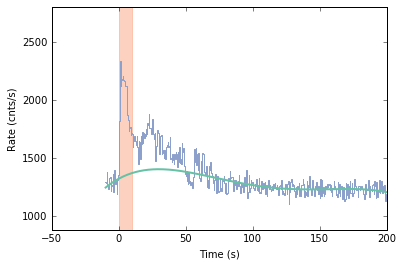

In [3]:
nai0.view_lightcurve(-10,200.,.5)

<font color='red'> Oy! That is not so nice! Luckily, we can simply select another interval! </font>


Looking for optimal polynomial grade:

delta log-likelihoods:
0 -> 1: delta Log-likelihood = 20.4455098764
1 -> 2: delta Log-likelihood = 0.0893514191266
2 -> 3: delta Log-likelihood = 0.305519165937
3 -> 4: delta Log-likelihood = 0.206091416767



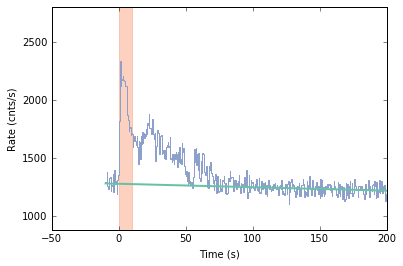

In [4]:
nai0.set_background_interval("-10.-0.","120-200") # You can select as many as required!
nai0.view_lightcurve(-10,200.,.5)

Ok! This is a much better fit. If we change our source interval the counts are automatically recalculated.
### Energy selection

We need to select the energies we would like to fit over. GBM has over/underflow channels which must be exlcuded from the fit. This is not always at the same energy, so we need to check.
**FermiGBM_TTE_Like**  (and **FermiGBMLike** ) allow you to plot the count spectra so you can see what you will be excluding in the fit.

Now using 116 channels out of 128


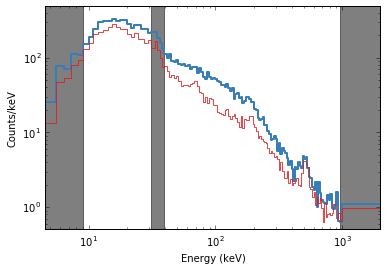

In [5]:
nai0.set_active_measurements("10.0-30.0", "40.0-950.0")
nai0.view_count_spectrum()

Now using 115 channels out of 128


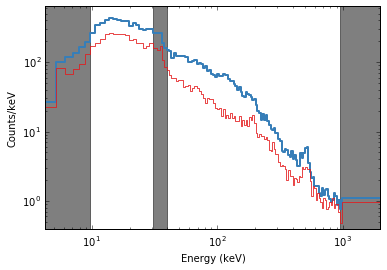

In [6]:
nai3.set_active_measurements("10.0-30.0", "40.0-950.0")
nai3.view_count_spectrum()

Now using 115 channels out of 128


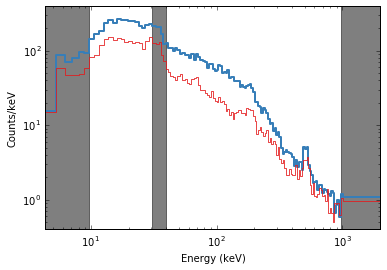

In [7]:
nai4.set_active_measurements("10.0-30.0", "40.0-950.0")
nai4.view_count_spectrum()

Now using 126 channels out of 128


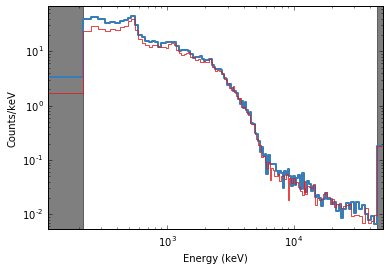

In [8]:
bgo0.set_active_measurements("250-43000")
bgo0.view_count_spectrum()

## Fitting!

We are now ready for the standard **3ML** process:


In [9]:
triggerName = 'bn080916009'
ra = 121.8
dec = -61.3


data_list = DataList( nai0,nai3,nai4,bgo0 )

band = Band()


GRB = PointSource( triggerName, ra, dec, spectral_shape=band )

model = Model( GRB )

GRB.display()

* bn080916009 (point source): 
    * position: 
      * ra: 
        * value: 121.8
        * desc: Right Ascension
        * min_value: 0.0
        * max_value: 360.0
        * unit: deg
      * dec: 
        * value: -61.3
        * desc: Declination
        * min_value: -90.0
        * max_value: 90.0
        * unit: deg
      * equinox: J2000
    * spectrum: 
      * main: 
        * Band: 
          * K: 
            * value: 0.0001
            * desc: Differential flux at the pivot energy
            * min_value: None
            * max_value: None
            * unit: 1 / (cm2 keV s)
          * alpha: 
            * value: -1.0
            * desc: low-energy photon index
            * min_value: -1.5
            * max_value: 0.0
            * unit: 
          * xp: 
            * value: 350.0
            * desc: peak in the x * x * N (nuFnu if x is a energy)
            * min_value: 10.0
            * max_value: None
            * unit: keV
          * beta: 
            * value: -2.0
            * desc: high-energy photon index
            * min_value: -3.0
            * max_value: -1.5
            * unit: 
          * piv: 
            * value: 100.0
            * desc: pivot energy
            * min_value: None
            * max_value: None
            * unit: keV

In [10]:
jl = JointLikelihood( model, data_list, verbose=False )

res = jl.fit()

Best fit values:



Name,Value,Unit
bn080916009.spectrum.main.Band.K,0.0308 +/- 0.0009,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-0.942 +/- 0.025,
bn080916009.spectrum.main.Band.xp,(6.9 +/- 0.7)e+02,keV
bn080916009.spectrum.main.Band.beta,-2.08 +/- 0.09,



NOTE: errors on parameters are approximate. Use get_errors().

Nuisance parameters:



Name,Value,Unit
InterCalib_of_NAI0,1,
InterCalib_of_NAI3,1,
InterCalib_of_NAI4,1,
InterCalib_of_BGO0,1,



Correlation matrix:



1.00,0.83,-0.94,0.42
0.83,1.00,-0.84,0.34
-0.94,-0.84,1.00,-0.55
0.42,0.34,-0.55,1.00



Minimum of -logLikelihood is: 3138.43033319

Contributions to the -logLikelihood at the minimum:



Detector,-LogL
NAI0,769.52
NAI3,770.10
NAI4,743.07
BGO0,855.75


In [11]:
res = jl.get_errors()

Name,Value,Unit
bn080916009.spectrum.main.Band.K,0.0308 -0.0009 +0.0013,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-0.942 -0.025 +0.034,
bn080916009.spectrum.main.Band.xp,(6.9 -0.8 +0.8)e+02,keV
bn080916009.spectrum.main.Band.beta,-2.08 -0.09 +0.09,


 [*********************100%***********************]  30 of 30 completed in 4.8 s

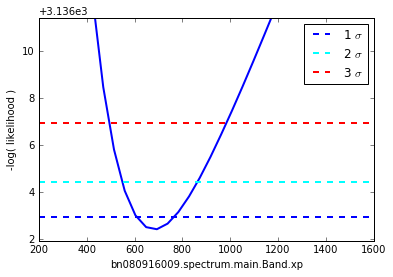

In [12]:
res = jl.get_contours(band.xp,200,1500,30)

 [*********************100%***********************]  625 of 625 completed in 72.2 s


WARNING UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


WARNING UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



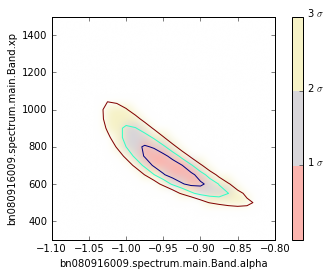

In [13]:
res = jl.get_contours(band.xp,300,1500,25,band.alpha,-1.1,-0.8,25)

##  Bayesian analysis

In [15]:
band.K.prior     = Log_uniform_prior(lower_bound=1E-2, upper_bound=5)
band.xp.prior    = Log_uniform_prior(lower_bound=1E2, upper_bound=2E3)
band.alpha.prior = Uniform_prior(lower_bound=-1.5,upper_bound=0.)
band.beta.prior  = Uniform_prior(lower_bound=-3.,upper_bound=-1.5)

bayes = BayesianAnalysis(model, data_list)

In [16]:
samples = bayes.sample(n_walkers=50,burn_in=100, n_samples=1000)

Running burn-in of 100 samples...

 [*********************100%***********************]  100 of 100 completed in 13.7 s

Sampling...

 [**********************99%***********************]  992 of 1000 completed in 135.4 s
Mean acceptance fraction: 0.5811


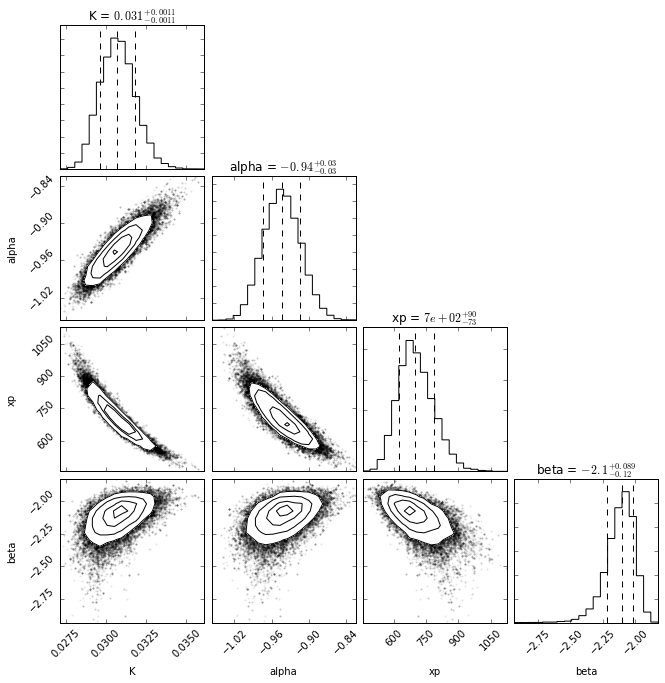

In [17]:
fig = bayes.corner_plot(plot_contours=True, plot_density=False)

# TODO

* Export TTE selections to PHA files for XSPEC
* Handling RSP2 files correctly
* Your suggestions!